In [1]:
##import Packages
import pandas as pd
import math
import scipy.stats
from matplotlib import pyplot as plt
import numpy as np

In [2]:
##import data
df_Test_Overall = pd.read_csv(r'MTA AB Visit Data Test1_2.csv')
#df_testgroupmapping= pd.read_csv(r'MTA AB Test Group Map.csv')
#df_test_overlapped=pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\MTA AB Visit Data Test 3 -- overlapped.csv')
df_rev = pd.read_csv(r'MTA AB Rev Data.csv')
df_cateforymap=pd.read_csv(r'MTA AB Category Mapping.csv')

In [3]:
df_Test_Overall

,Unnamed: 0,testid,ControlGroup,Date,SessionID,ChannelID,CategoryID,PlatformID,CusID,VisitorTypeID,Time,Bounced,SawProduct,AddedToCart,ReachedCheckout,Converted
0,0,2,1,2019-07-11,7685274065188263037,611,3,1,5299256406894404939,4,434,0,1,0,0,0
1,1,2,1,2019-07-11,6449284229458809869,235,1,1,706543536253348169,4,338,0,1,0,0,0
2,2,2,0,2019-07-11,509870060026686560,336,1,1,2082623938737374415,2,0,1,0,0,0,0
3,3,2,1,2019-07-11,3589887684654054988,665,5,1,7908654078631292723,3,25,0,1,0,0,0
4,4,2,1,2019-07-11,7081653159511501375,2023,1,1,8078626604090692368,3,390,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13865411,13865411,1,0,2019-05-10,6102357546048967653,235,1,1,3245711873504325100,4,1712,0,1,0,0,0
13865412,13865412,1,1,2019-05-10,4048238120487815131,665,3,1,4469163688177765207,4,142,0,1,0,0,0
13865413,13865413,1,0,2019-05-10,5709009722269334123,722,1,1,772778977274792118,4,0,1,0,0,0,0
13865414,13865414,1,0,2019-05-10,9097707239108680272,657,5,1,140972094988379001,2,0,1,0,0,0,0


In [4]:
df_Test=df_Test_Overall[df_Test_Overall['testid']==2]

In [5]:
#check the number of control and var
df_Test.drop_duplicates(['ControlGroup','SessionID']).groupby(['ControlGroup'])['SessionID'].count()
#yes,they are almost equal!


ControlGroup
0    3436671
1    3433997
Name: SessionID, dtype: int64

In [6]:
#check how many traffic are in our test(2) each day
df_Test.drop_duplicates(['Date','SessionID']).groupby(['Date'])['SessionID'].count()
#and we found out the 4 days at the beginning and the last day our traffic have some problem

Date
2019-06-14        69
2019-06-15     59090
2019-06-16    127364
2019-06-17    137998
2019-06-18    173863
2019-06-19    194491
2019-06-20    193602
2019-06-21    200563
2019-06-22    199843
2019-06-23    193444
2019-06-24    180545
2019-06-25    222073
2019-06-26    266630
2019-06-27    248291
2019-06-28    257540
2019-06-29    252746
2019-06-30    233204
2019-07-01    199913
2019-07-02    242003
2019-07-03    298940
2019-07-04    305270
2019-07-05    669742
2019-07-06    363540
2019-07-07    290989
2019-07-08    239339
2019-07-09    275926
2019-07-10    358101
2019-07-11    332720
2019-07-12    152829
Name: SessionID, dtype: int64

In [7]:
# so we want to exclude the date for these days from the original test dataset for test2.
df_Test=df_Test[pd.to_datetime(df_Test['Date'])>pd.to_datetime('2019-06-17')]
df_Test=df_Test[pd.to_datetime(df_Test['Date'])<pd.to_datetime('2019-07-12')]

In [8]:
#lets see how our data looks now
df_Test.drop_duplicates(['Date','SessionID']).groupby(['Date'])['SessionID'].count()
#yeahee!we've exclude them succussfully

Date
2019-06-18    173863
2019-06-19    194491
2019-06-20    193602
2019-06-21    200563
2019-06-22    199843
2019-06-23    193444
2019-06-24    180545
2019-06-25    222073
2019-06-26    266630
2019-06-27    248291
2019-06-28    257540
2019-06-29    252746
2019-06-30    233204
2019-07-01    199913
2019-07-02    242003
2019-07-03    298940
2019-07-04    305270
2019-07-05    669742
2019-07-06    363540
2019-07-07    290989
2019-07-08    239339
2019-07-09    275926
2019-07-10    358101
2019-07-11    332720
Name: SessionID, dtype: int64

In [9]:
import gc
gc.collect()


40

In [10]:
#get the counts of session_id for each test group and store the result into new a pandas data frame named df_result
df_Result=pd.DataFrame(df_Test.drop_duplicates(['SessionID','ControlGroup']).groupby('ControlGroup')['SessionID'].count())

In [11]:
df_Result

,SessionID
ControlGroup,
0,3197663
1,3195655


In [12]:
metrics=['Bounced','SawProduct','AddedToCart','ReachedCheckout','Converted']
#create loop to get all the counts of "1" for each metrics
for metric in metrics:
    #get the column of "1s" for that metric,then count the number of it,then store the row of result number as a.
    a=df_Test[df_Test[metric]==1].drop_duplicates(['SessionID','ControlGroup']).groupby('ControlGroup')['SessionID'].count()
    #define the column name as that metric name
    a.name=metric
    #join each result on the df_result dataframe we've crested above.
    df_Result=df_Result.join(a)

In [13]:
df_Result

,SessionID,Bounced,SawProduct,AddedToCart,ReachedCheckout,Converted
ControlGroup,,,,,,
0,3197663,632191,2325995,975934,483993,354340
1,3195655,631957,2325654,975034,483729,353260


In [14]:
def z_test_calculator(df,denominator,numerator):
    #df: dataframe containing the result (absolute counts)
    #denominator: str
    #numerator:str
    
    #get the data [1,]or[0,] is control or variation,denominator and numerator is our imput,
    #normally it should be a count of total number, and a count of the metric number we observed.
    control_denominator=df.loc[1,denominator]
    var_denominator=df.loc[0,denominator]
    control_numerator=df.loc[1,numerator]
    var_numerator=df.loc[0,numerator]    
    
    #caculate the Rate: simply do 2 divide
    control_rate=control_numerator/control_denominator
#     print(control_numerator)
#     print(control_denominator)
    var_rate=var_numerator/var_denominator
    
    #calculate the STD: sd=p(1-p)/N 再开根号
#     print(control_rate)
    control_sd=math.sqrt(control_rate*(1-control_rate)/control_denominator)
    
    var_sd=math.sqrt(var_rate*(1-var_rate)/var_denominator)
    
    #z score =两个rate的差值/control和variation的平均标准差
    #control和variation的平均标准差=control的标准差的平方+variation的标准差的平方 再开根号
    
    z_score=(control_rate-var_rate)/math.sqrt(pow(control_sd,2)+pow(var_sd,2))
    
    
    #p value python有方法可以直接找到pvalue，simply input the absolute value of z_score.
    p_value=scipy.stats.norm.sf(abs(z_score))
    
    
    #lift simple subtract and divide
    perc_lift=(var_rate-control_rate)/control_rate
    abs_lift=(var_rate-control_rate)
    
    return (p_value,perc_lift,abs_lift)

In [15]:
user_types=['SessionID','CusID']
dic_final={}
metrics=['Bounced','SawProduct','AddedToCart','ReachedCheckout','Converted']

for user_type in user_types:
    df_Result_any=pd.DataFrame(df_Test.drop_duplicates([user_type,'ControlGroup']).groupby('ControlGroup')[user_type].count())
    
    for metric in metrics:
        a=df_Test[df_Test[metric]==1].drop_duplicates([user_type,'ControlGroup']).groupby('ControlGroup')[user_type].count()
        a.name=metric
        df_Result_any=df_Result_any.join(a)

    KPIs=[(user_type,'Bounced'),
          (user_type,'SawProduct'),
          (user_type,'AddedToCart'),
          (user_type,'ReachedCheckout'),
          (user_type,'Converted'),
          ('AddedToCart','ReachedCheckout'),
          ('ReachedCheckout','Converted'),
          ('AddedToCart','Converted')]

    for index in df_Result_any.index:
        j=0
        if index!=1:
            df_each_group=df_Result_any

            df_final=pd.DataFrame()

            for i in KPIs:
                result=z_test_calculator(df_each_group,i[0],i[1])
                df_final.loc[j,'denominator']=i[0]
                df_final.loc[j,'numerator']=i[1]
                df_final.loc[j,'p_value']=result[0]
                df_final.loc[j,'perc_lift']=result[1]
                df_final.loc[j,'abs_lift']=result[2]
                j=j+1
            dic_final[user_type]=df_final


In [16]:
df_Result_any

,CusID,Bounced,SawProduct,AddedToCart,ReachedCheckout,Converted
ControlGroup,,,,,,
0,859851,311019,810566,669829,387717,313232
1,859769,310735,810408,669890,387516,312617


In [17]:
dic_final['CusID']

,denominator,numerator,p_value,perc_lift,abs_lift
0,CusID,Bounced,0.343214,0.000819,0.000296
1,CusID,SawProduct,0.395637,0.000100,0.000094
2,CusID,AddedToCart,0.409220,-0.000186,-0.000145
3,CusID,ReachedCheckout,0.400754,0.000423,0.000191
4,CusID,Converted,0.176847,0.001872,0.000681
5,AddedToCart,ReachedCheckout,0.339638,0.000610,0.000353
6,ReachedCheckout,Converted,0.096172,0.001448,0.001168
7,AddedToCart,Converted,0.132572,0.002059,0.000961


In [18]:
writer = pd.ExcelWriter('Final_data_Test2.xlsx')
for key in dic_final.keys():
    dic_final[key].to_excel(writer, sheet_name=key)
writer.save()

In [19]:
df_test_data = df_Test.copy()
dic_final_cuts_usertype = {}
user_types = ['SessionID','CusID']
cuts = ['CategoryID', 'PlatformID','VisitorTypeID']

In [20]:
for user_type in user_types:
    print(user_type)
    for cut in cuts:
        print(cut)
 
        for p in set(df_test_data[cut]):

            df_Test_cut = df_test_data[df_test_data[cut]==p]
            df_Result_any1 = pd.DataFrame(df_Test_cut.drop_duplicates([user_type,'ControlGroup']).groupby('ControlGroup')[user_type].count())

            metrics = ['Bounced','SawProduct','AddedToCart','ReachedCheckout','Converted']
            for metric in metrics:
                a = df_Test_cut[df_Test_cut[metric]==1].drop_duplicates([user_type,'ControlGroup']).groupby('ControlGroup')[user_type].count()
                a.name = metric
                df_Result_any1 = df_Result_any1.join(a)
                print(df_Result_any1)


            KPIs=[(user_type,'Bounced'),
          (user_type,'SawProduct'),
          (user_type,'AddedToCart'),
          (user_type,'ReachedCheckout'),
          (user_type,'Converted'),
          ('AddedToCart','ReachedCheckout'),
          ('ReachedCheckout','Converted'),
          ('AddedToCart','Converted')]

            for index in df_Result_any1.index:
                j=0
                #reset the index
                if index!=1:
                    df_each_group = df_Result_any1
                    df_final=pd.DataFrame()


                    for i in KPIs:
                        result=z_test_calculator(df_each_group,i[0],i[1])
                        df_final.loc[j,'denominator']=i[0]
                        df_final.loc[j,'numerator'] = i[1]
                        df_final.loc[j,'p_value'] = result[0]
                        df_final.loc[j,'perc_lift'] = result[1]
                        df_final.loc[j,'abs_lift']= result[2]
                        j=j+1

                    dic_final_cuts_usertype[user_type+'_'+cut+str(p)]= df_final 

SessionID
CategoryID
              SessionID  Bounced
ControlGroup                    
0               2065904   337552
1               2063830   337170
              SessionID  Bounced  SawProduct
ControlGroup                                
0               2065904   337552     1309013
1               2063830   337170     1307975
              SessionID  Bounced  SawProduct  AddedToCart
ControlGroup                                             
0               2065904   337552     1309013       647669
1               2063830   337170     1307975       646297
              SessionID  Bounced  SawProduct  AddedToCart  ReachedCheckout
ControlGroup                                                              
0               2065904   337552     1309013       647669           343608
1               2063830   337170     1307975       646297           343107
              SessionID  Bounced  SawProduct  AddedToCart  ReachedCheckout  \
ControlGroup                                             

              SessionID  Bounced  SawProduct  AddedToCart  ReachedCheckout  \
ControlGroup                                                                 
0                 82226     2703       77471        74171            21580   
1                 81933     2827       77045        73959            22004   

              Converted  
ControlGroup             
0                 13387  
1                 13673  
              SessionID  Bounced
ControlGroup                    
0                301076    49405
1                300798    49258
              SessionID  Bounced  SawProduct
ControlGroup                                
0                301076    49405      250431
1                300798    49258      249812
              SessionID  Bounced  SawProduct  AddedToCart
ControlGroup                                             
0                301076    49405      250431       133756
1                300798    49258      249812       134197
              SessionID  Bounced  SawPr

               CusID  Bounced  SawProduct  AddedToCart  ReachedCheckout
ControlGroup                                                           
0             105881    35985       97790        43318            19947
1             105770    35495       97902        43841            20192
               CusID  Bounced  SawProduct  AddedToCart  ReachedCheckout  \
ControlGroup                                                              
0             105881    35985       97790        43318            19947   
1             105770    35495       97902        43841            20192   

              Converted  
ControlGroup             
0                 14153  
1                 14395  
               CusID  Bounced
ControlGroup                 
0             215162    71613
1             214513    71613
               CusID  Bounced  SawProduct
ControlGroup                             
0             215162    71613      198412
1             214513    71613      197984
               CusI

In [21]:
df_Result_any1
#this is the last df_Result_any1 version,1st one sgould be session level

,CusID,Bounced,SawProduct,AddedToCart,ReachedCheckout,Converted
ControlGroup,,,,,,
0,532455,230589,481079,353933,231247,196714
1,531705,229758,480677,352917,230285,195879


In [22]:
dic_final_cuts_usertype['SessionID_CategoryID2']

,denominator,numerator,p_value,perc_lift,abs_lift
0,SessionID,Bounced,0.158042,-0.004338,-0.001111
1,SessionID,SawProduct,0.269255,-0.000548,-0.000488
2,SessionID,AddedToCart,0.178317,-0.003555,-0.001075
3,SessionID,ReachedCheckout,0.371294,-0.002131,-0.000283
4,SessionID,Converted,0.215666,0.006026,0.000599
5,AddedToCart,ReachedCheckout,0.392176,0.001430,0.000628
6,ReachedCheckout,Converted,0.021285,0.008174,0.006115
7,AddedToCart,Converted,0.073090,0.009616,0.003160


In [23]:
#excel contain all the possible cuts
writer = pd.ExcelWriter('Final_cuts_data_Test2.xlsx')
for key in dic_final_cuts_usertype.keys():
    dic_final_cuts_usertype[key].to_excel(writer, sheet_name=key)
writer.save()

In [24]:
df_Rev=df_rev[df_rev['testid']==2]
df_Rev

,testid,ControlGroup,"""Date""",SessionID,TotalRevenue
0,2,1,2019-06-26,3170596292771148233,57.98
1,2,1,2019-06-26,4521151331680385048,58.12
2,2,1,2019-06-26,4428930296371807923,383.65
3,2,1,2019-06-26,6052920253472641352,321.28
4,2,1,2019-06-26,2588857339142965515,94.99
...,...,...,...,...,...
1436608,2,1,2019-07-10,4311810967276854497,111.92
1436609,2,1,2019-07-10,8732164761108861961,34.98
1436610,2,0,2019-07-10,5111084495368699663,92.97
1436611,2,1,2019-07-10,3813826744978896205,43.98


In [25]:
Control_Rev=df_Rev[df_Rev['ControlGroup']==1]['TotalRevenue'].array
Var_Rev=df_Rev[df_Rev['ControlGroup']==0]['TotalRevenue'].array

In [26]:
Control_Rev

<PandasArray>
[ 57.98,  58.12, 383.65, 321.28,  94.99, 296.98, 115.99, 269.99,  77.29,
  53.99,
 ...
  51.98, 404.66, 119.97, 144.82, 118.99, 360.74, 683.89, 111.92,  34.98,
  43.98]
Length: 385706, dtype: float64

In [27]:
scipy.stats.mannwhitneyu(Control_Rev,Var_Rev)

MannwhitneyuResult(statistic=74548964432.0, pvalue=0.37305166491932945)

In [28]:
df_Result.loc[1,'Rev']=sum(Control_Rev)
df_Result.loc[0,'Rev']=sum(Var_Rev)

df_Result.loc[1,'Rev_sq']=sum(Control_Rev**2)
df_Result.loc[0,'Rev_sq']=sum(Var_Rev**2)


In [29]:
df_Result

,SessionID,Bounced,SawProduct,AddedToCart,ReachedCheckout,Converted,Rev,Rev_sq
ControlGroup,,,,,,,,
0,3197663,632191,2325995,975934,483993,354340,1.151095e+08,1.126708e+11
1,3195655,631957,2325654,975034,483729,353260,1.153890e+08,1.195801e+11


In [30]:
df_Result_any.loc[1,'Rev']=sum(Control_Rev)
df_Result_any.loc[0,'Rev']=sum(Var_Rev)

df_Result_any.loc[1,'Rev_sq']=sum(Control_Rev**2)
df_Result_any.loc[0,'Rev_sq']=sum(Var_Rev**2)

In [31]:
df_Result_any

,CusID,Bounced,SawProduct,AddedToCart,ReachedCheckout,Converted,Rev,Rev_sq
ControlGroup,,,,,,,,
0,859851,311019,810566,669829,387717,313232,1.151095e+08,1.126708e+11
1,859769,310735,810408,669890,387516,312617,1.153890e+08,1.195801e+11


In [32]:
def z_test_calculator_continuous(df,denominator,numerator,numerator_sq):
    #df: dataframe containing the result (absolute counts)
    #denominator: str
    #numerator:str
    #numerator_sq:str
    
    #get the data
    control_denominator=df.loc[1,denominator]
    var_denominator=df.loc[0,denominator]
    control_numerator=df.loc[1,numerator]
    var_numerator=df.loc[0,numerator]    
    
    #Rate
    control_rate=control_numerator/control_denominator
    var_rate=var_numerator/var_denominator
    
    #Variance

    control_var=df.loc[1,numerator_sq]/control_denominator-control_rate**2
    var_var=df.loc[0,numerator_sq]/var_denominator-var_rate**2
    
    #z score
    z_score=(control_rate-var_rate)/math.sqrt(control_var/control_denominator+var_var/var_denominator)
    
    
    #p value
    p_value=scipy.stats.norm.sf(abs(z_score))
    
    
    #lift
    perc_lift=(var_rate-control_rate)/control_rate
    abs_lift=(var_rate-control_rate)
    
    return (p_value,perc_lift,abs_lift)

In [33]:
dic_rev_final={}
for index in df_Result.index:
    
    if index!=1:
        df_each_group=df_Result_any

        result=z_test_calculator_continuous(df_each_group,'Converted','Rev','Rev_sq')
        
        dic_rev_final['Variation']= result

In [34]:
dic_rev_final

{'Variation': (0.0937205749261622, -0.004381197833006567, -1.6171293066565227)}

In [35]:
dic_rev_final=pd.DataFrame(dic_rev_final).T
dic_rev_final

,0,1,2
Variation,0.093721,-0.004381,-1.617129


In [36]:
dic_rev_final=dic_rev_final.rename(columns={0:'p_value',1:'perc_lift',2:'abs_lift'})
dic_rev_final

,p_value,perc_lift,abs_lift
Variation,0.093721,-0.004381,-1.617129


In [37]:
writer = pd.ExcelWriter('Final_revenue_data_Test2.xlsx')
dic_rev_final.to_excel(writer, sheet_name=key)
writer.save()

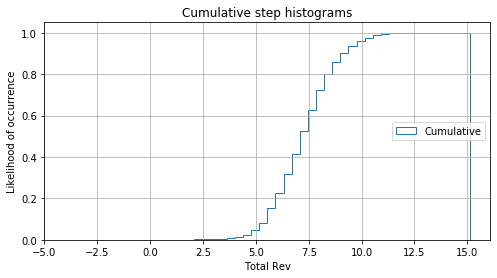

In [38]:
import numpy as np
import matplotlib.pyplot as plt


x= df_Rev.loc[df_Rev['ControlGroup']==1,'TotalRevenue'].apply(lambda x: math.log(x,2))

n_bins=50

fig,ax = plt.subplots(figsize=(8,4))

n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Cumulative')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Total Rev')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

In [39]:
P1=np.percentile(Control_Rev,90)
P2=np.percentile(Var_Rev,90)

In [40]:
scipy.stats.mannwhitneyu(Control_Rev[Control_Rev<P1],Var_Rev[Var_Rev<P2])

MannwhitneyuResult(statistic=60374303436.0, pvalue=0.3363424680652818)

In [41]:
##what to input for continuous test:

df_Result_any.loc[1,'Rev']=sum(Control_Rev[Control_Rev<P1])
df_Result_any.loc[0,'Rev']=sum(Var_Rev[Var_Rev<P2])

df_Result_any.loc[1,'Rev_sq']=sum(Control_Rev[Control_Rev<P1]**2)
df_Result_any.loc[0,'Rev_sq']=sum(Var_Rev[Var_Rev<P2]**2)


In [42]:
df_Result_any

,CusID,Bounced,SawProduct,AddedToCart,ReachedCheckout,Converted,Rev,Rev_sq
ControlGroup,,,,,,,,
0,859851,311019,810566,669829,387717,313232,6.591366e+07,1.966987e+10
1,859769,310735,810408,669890,387516,312617,6.571123e+07,1.961182e+10


In [43]:
dic_rev_final={}
for index in df_Result.index:
    j=0
    if index!=1:
        df_each_group=df_Result_any
      
        df_final=pd.DataFrame()
        result=z_test_calculator_continuous(df_each_group,'Converted','Rev','Rev_sq')
        j=j+1
        dic_rev_final['Variation']= result

In [44]:
dic_rev_final

{'Variation': (0.2486895460739173, 0.0011111497447062147, 0.2335606217301347)}

In [61]:
numerator='ReachedCheckout'
#numerator='Converted'
denominator='AddedToCart'
#denominator='AddedToCart'

denominator_dailydata=df_Test[(df_Test[denominator]==1) & (df_Test['testid']==2)].drop_duplicates(['SessionID', 'ControlGroup']).groupby(['Date','ControlGroup'])['SessionID'].count()
numerator_dailydata=df_Test[(df_Test[numerator]==1) & (df_Test['testid']==2)].drop_duplicates(['SessionID', 'ControlGroup']).groupby(['Date','ControlGroup'])['SessionID'].count()
numerator_dailydata.name=numerator
denominator_dailydata.name=denominator

In [62]:
denominator_dailydata

Date        ControlGroup
2019-06-18  0                39313
            1                39337
2019-06-19  0                36942
            1                36575
2019-06-20  0                33301
            1                33811
2019-06-21  0                32760
            1                32999
2019-06-22  0                31338
            1                31589
2019-06-23  0                30347
            1                30114
2019-06-24  0                32096
            1                31662
2019-06-25  0                40070
            1                39667
2019-06-26  0                40224
            1                40256
2019-06-27  0                35993
            1                35736
2019-06-28  0                35619
            1                35951
2019-06-29  0                34555
            1                34223
2019-06-30  0                32152
            1                31543
2019-07-01  0                31026
            1                3

In [63]:
denominator_aggdailydata=denominator_dailydata.reset_index()
numerator_aggdailydata=numerator_dailydata.reset_index()
denominator_aggdailydata[denominator]=denominator_aggdailydata.groupby('ControlGroup')[denominator].cumsum()
numerator_aggdailydata[numerator]=numerator_aggdailydata.groupby('ControlGroup')[numerator].cumsum()

In [64]:
df_cumsum=pd.DataFrame()
for date in df_Test.drop_duplicates('Date')['Date'].tolist():
    
    df=denominator_aggdailydata[denominator_aggdailydata['Date']==date].set_index('ControlGroup',drop=True)
    df=df.merge(numerator_aggdailydata[numerator_aggdailydata['Date']==date].set_index('ControlGroup',drop=True),on='Date',left_index=True,right_index=True)    
#这里结束可以查看一下df 

    sig_result=z_test_calculator(df,denominator, numerator)
    df_cumsum.loc[date,'Sig_Level']=1-sig_result[0]
    df_cumsum.loc[date,'Lift']=sig_result[1]

In [65]:
df

,Date,AddedToCart,ReachedCheckout
ControlGroup,,,
0,2019-07-08,857166,427419
1,2019-07-08,856582,427703


In [66]:
df_cumsum

,Sig_Level,Lift
2019-07-11,0.603035,-0.000377
2019-07-09,0.839357,-0.001487
2019-06-26,0.690304,-0.001282
2019-06-24,0.825820,0.002796
2019-06-25,0.628048,0.000901
2019-06-27,0.795884,-0.002027
2019-07-10,0.649901,-0.000566
2019-06-28,0.769998,-0.001730
2019-06-18,0.775553,-0.005464
2019-06-29,0.763737,-0.001618


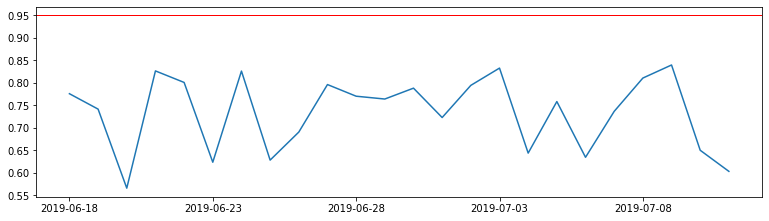

In [67]:
import numpy as np
import matplotlib.pyplot as plt
#用df_cumsum.sort_index()拿出日期排序做x轴
ax = df_cumsum.sort_index()['Sig_Level'].plot(figsize=(13,3.5))
ax.axhline(y=0.95,linewidth=1,color='r')

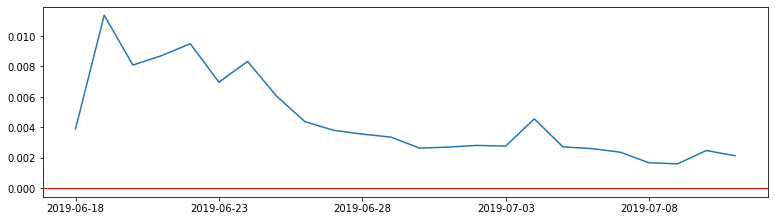

In [60]:
ax = df_cumsum.sort_index()['Lift'].plot(figsize=(13,3.5))
ax.axhline(y=0,linewidth=1,color='r')